# Mini-Project: COVID-19 Daily Cases for Orange County

Using live data from the Johns Hopkins website and the pandas module, we will create a bar plot showing the daily number of new cases in Orange County.

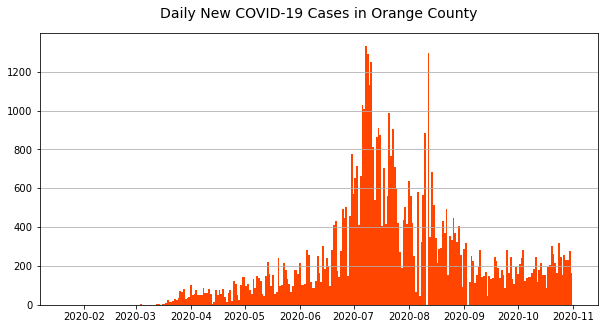

In [55]:
import numpy as np
import pandas as pd

## Creating DataFrames

DataFrames look a lot like spreadsheets. They created as collections of Series (columns).

In [56]:
data = [['Joshua', 39], ['LeeAnn', 39], ['Hannah', 10], ['Elizabeth', 8], ['Lydia', 8], ['Hershey', 3]] 
df1 = pd.DataFrame(data, columns = ['Name', 'Age'])
df1

,Name,Age
0,Joshua,39
1,LeeAnn,39
2,Hannah,10
3,Elizabeth,8
4,Lydia,8
5,Hershey,3


In [57]:
df1.head(3)

,Name,Age
0,Joshua,39
1,LeeAnn,39
2,Hannah,10


In [58]:
df1.tail(3)

,Name,Age
3,Elizabeth,8
4,Lydia,8
5,Hershey,3


In [59]:
df1["Name"]

0       Joshua
1       LeeAnn
2       Hannah
3    Elizabeth
4        Lydia
5      Hershey
Name: Name, dtype: object

In [60]:
data = {'Name':['Larry', 'Pam', 'Joshua', 'Janine', 'Jennifer', 'Juliana'], 'Age':[67, 61, 39, 37, 34, 22]} 
df2 = pd.DataFrame(data)
df2

,Name,Age
0,Larry,67
1,Pam,61
2,Joshua,39
3,Janine,37
4,Jennifer,34
5,Juliana,22


In [61]:
data = [{'Name': 'Barb', 'Age': 3}, {'Name':'Pale', 'Age': 3}, 
        {'Name':'Chip', 'Age': 1}, {'Name':'Charcoal', 'Age': 1}, 
        {'Name':'Red', 'Age': 1}, {'Name':'Black Beak', 'Age': 1}] 
df3 = pd.DataFrame(data) 
df3 

,Name,Age
0,Barb,3
1,Pale,3
2,Chip,1
3,Charcoal,1
4,Red,1
5,Black Beak,1


In [62]:
data = {'Name':['Larry', 'Pam', 'Joshua', 'Janine', 'Jennifer', 'Juliana'], 
        'Age':[67, 61, 39, 37, 34, 22],
        'Job':['Retired', 'Small Business', 'Teacher', 'Engineer', 'Teacher', 'Student'],
        'Field':['Biology', 'Music', 'Cyber Security', 'Computer', 'Math', 'Art'],
        'State':['CA', 'CA', 'CA', 'CA', 'SC', 'CA'],
        'Region':['Central Valley', 'Central Valley', 'Traverse Range', 'SF Bay Area', 'Central', 'SF Bay Area']}
df = pd.DataFrame(data)
df

,Name,Age,Job,Field,State,Region
0,Larry,67,Retired,Biology,CA,Central Valley
1,Pam,61,Small Business,Music,CA,Central Valley
2,Joshua,39,Teacher,Cyber Security,CA,Traverse Range
3,Janine,37,Engineer,Computer,CA,SF Bay Area
4,Jennifer,34,Teacher,Math,SC,Central
5,Juliana,22,Student,Art,CA,SF Bay Area


## Selecting Columns and Filtering

We can access information in various columns and filter down to only certain results using a series of boolean filters. Complex filters must have each term enclosed with parenthesis `()` and then combined with bitwise operators `&` `|` `~` `^`

In [63]:
ca_residents = df["State"] == "CA"
ca_residents

0     True
1     True
2     True
3     True
4    False
5     True
Name: State, dtype: bool

In [64]:
df[ca_residents]

,Name,Age,Job,Field,State,Region
0,Larry,67,Retired,Biology,CA,Central Valley
1,Pam,61,Small Business,Music,CA,Central Valley
2,Joshua,39,Teacher,Cyber Security,CA,Traverse Range
3,Janine,37,Engineer,Computer,CA,SF Bay Area
5,Juliana,22,Student,Art,CA,SF Bay Area


In [65]:
teachers = df["Job"] == "Teacher"
teachers

0    False
1    False
2     True
3    False
4     True
5    False
Name: Job, dtype: bool

In [66]:
df[teachers]

,Name,Age,Job,Field,State,Region
2,Joshua,39,Teacher,Cyber Security,CA,Traverse Range
4,Jennifer,34,Teacher,Math,SC,Central


In [67]:
df[ca_residents & teachers]

,Name,Age,Job,Field,State,Region
2,Joshua,39,Teacher,Cyber Security,CA,Traverse Range


In [68]:
df[(df["State"] == "CA") & (df["Job"] == "Teacher")]

,Name,Age,Job,Field,State,Region
2,Joshua,39,Teacher,Cyber Security,CA,Traverse Range


In [69]:
df["Years as Adult"] = df["Age"] - 18
df

,Name,Age,Job,Field,State,Region,Years as Adult
0,Larry,67,Retired,Biology,CA,Central Valley,49
1,Pam,61,Small Business,Music,CA,Central Valley,43
2,Joshua,39,Teacher,Cyber Security,CA,Traverse Range,21
3,Janine,37,Engineer,Computer,CA,SF Bay Area,19
4,Jennifer,34,Teacher,Math,SC,Central,16
5,Juliana,22,Student,Art,CA,SF Bay Area,4


## Loading from CSV Files

Of course, usually we will download data from some other source, such as a CSV file that can be a local or remote file.

In [70]:
stats = pd.read_csv("california_county_stats.txt", delimiter=",")
stats.head()

,County,Lat,Lon,Population,Area
0,Alameda,37.646294,-121.892927,1671329,738
1,Alpine,38.596786,-119.822359,1129,739
2,Amador,38.445831,-120.656960,39752,606
3,Butte,39.667278,-121.600525,219186,1640
4,Calaveras,38.205371,-120.552913,45905,1020


## Manipulating DataFrames

In [110]:
stats.iloc[2]

Lat              38.445831
Lon            -120.656960
Population    39752.000000
Area            606.000000
Density          65.600000
Name: Amador, dtype: float64

In [112]:
stats.iloc[:,2]

County
Alameda             1671329
Alpine                 1129
Amador                39752
Butte                219186
Calaveras             45905
Colusa                21547
Contra Costa        1153526
Del Norte             27812
El Dorado            192843
Fresno               999101
Glenn                 28393
Humboldt             135558
Imperial             181215
Inyo                  18039
Kern                 900202
Kings                152940
Lake                  64386
Lassen                30573
Los Angeles        10039107
Madera               157327
Marin                258826
Mariposa              17203
Mendocino             86749
Merced               277680
Modoc                  8841
Mono                  14444
Monterey             434061
Napa                 137744
Nevada                99755
Orange              3175692
Placer               398329
Plumas                18807
Riverside           2470546
Sacramento          1552058
San Benito            62808
San Bernardin

In [113]:
stats.iloc[15:19,0:3]

,Lat,Lon,Population
County,,,
Kings,36.074091,-119.815997,152940
Lake,39.101243,-122.753624,64386
Lassen,40.673113,-120.593510,30573
Los Angeles,34.308284,-118.228241,10039107


In [74]:
stats = stats.set_index("County")
stats.head()

,Lat,Lon,Population,Area
County,,,,
Alameda,37.646294,-121.892927,1671329,738
Alpine,38.596786,-119.822359,1129,739
Amador,38.445831,-120.656960,39752,606
Butte,39.667278,-121.600525,219186,1640
Calaveras,38.205371,-120.552913,45905,1020


In [75]:
stats.loc["San Bernardino"]

Lat           3.484060e+01
Lon          -1.161775e+02
Population    2.180085e+06
Area          2.006200e+04
Name: San Bernardino, dtype: float64

In [120]:
stats["Density"] = stats["Population"] / stats["Area"]
stats["Density"] = round(stats["Density"], 2)
stats

,Lat,Lon,Population,Area,Density
County,,,,,
Alameda,37.646294,-121.892927,1671329,738,2264.67
Alpine,38.596786,-119.822359,1129,739,1.53
Amador,38.445831,-120.656960,39752,606,65.60
Butte,39.667278,-121.600525,219186,1640,133.65
Calaveras,38.205371,-120.552913,45905,1020,45.00
Colusa,39.178820,-122.233173,21547,1151,18.72
Contra Costa,37.919235,-121.928953,1153526,720,1602.12
Del Norte,41.742283,-123.897406,27812,1008,27.59
El Dorado,38.779660,-120.523317,192843,1712,112.64


## Loading from Online Resources

In [134]:
covid_url  = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
covid_file = "time_series_covid19_confirmed_US.csv"

covid = pd.read_csv(covid_url + covid_file, delimiter=",")
covid.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2126,2141,2159,2173,2186,2197,2212,2230,2242,2267
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,6768,6888,6940,6966,6985,6995,7061,7097,7134,7188
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1055,1056,1060,1061,1065,1074,1079,1080,1090,1092
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,861,866,873,878,883,890,897,907,917,924
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2009,2039,2074,2095,2108,2162,2188,2222,2253,2286


In [136]:
covid = covid.rename(columns={"Admin2":"County", "Province_State":"State"})
covid.head()

,UID,iso2,iso3,code3,FIPS,County,State,Country_Region,Lat,Long_,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2126,2141,2159,2173,2186,2197,2212,2230,2242,2267
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,6768,6888,6940,6966,6985,6995,7061,7097,7134,7188
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1055,1056,1060,1061,1065,1074,1079,1080,1090,1092
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,861,866,873,878,883,890,897,907,917,924
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2009,2039,2074,2095,2108,2162,2188,2222,2253,2286


In [137]:
california_counties = covid["State"] == "California"
covid = covid[california_counties]
covid.head()

,UID,iso2,iso3,code3,FIPS,County,State,Country_Region,Lat,Long_,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,23636,23775,23876,23994,24095,24162,24233,24370,24418,24664
196,84006003,US,USA,840,6003.0,Alpine,California,US,38.596786,-119.822359,...,4,8,8,8,8,16,18,18,22,23
197,84006005,US,USA,840,6005.0,Amador,California,US,38.445831,-120.656960,...,337,338,344,347,352,357,361,362,363,369
198,84006007,US,USA,840,6007.0,Butte,California,US,39.667278,-121.600525,...,3134,3143,3160,3172,3185,3198,3211,3218,3239,3254
199,84006009,US,USA,840,6009.0,Calaveras,California,US,38.205371,-120.552913,...,347,347,354,354,354,354,361,361,361,366


In [138]:
unused_columns = ["UID", "iso2", "iso3", "code3", "FIPS", "Long_", "Lat", "Country_Region", "Combined_Key", "State"]
covid = covid.drop(columns=unused_columns)
covid.head()

,County,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
195,Alameda,0,0,0,0,0,0,0,0,0,...,23636,23775,23876,23994,24095,24162,24233,24370,24418,24664
196,Alpine,0,0,0,0,0,0,0,0,0,...,4,8,8,8,8,16,18,18,22,23
197,Amador,0,0,0,0,0,0,0,0,0,...,337,338,344,347,352,357,361,362,363,369
198,Butte,0,0,0,0,0,0,0,0,0,...,3134,3143,3160,3172,3185,3198,3211,3218,3239,3254
199,Calaveras,0,0,0,0,0,0,0,0,0,...,347,347,354,354,354,354,361,361,361,366


In [139]:
covid = covid.set_index("County")
covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0,0,0,0,0,0,0,0,0,0,...,23636,23775,23876,23994,24095,24162,24233,24370,24418,24664
Alpine,0,0,0,0,0,0,0,0,0,0,...,4,8,8,8,8,16,18,18,22,23
Amador,0,0,0,0,0,0,0,0,0,0,...,337,338,344,347,352,357,361,362,363,369
Butte,0,0,0,0,0,0,0,0,0,0,...,3134,3143,3160,3172,3185,3198,3211,3218,3239,3254
Calaveras,0,0,0,0,0,0,0,0,0,0,...,347,347,354,354,354,354,361,361,361,366


## Intermediate Data Processing

In [140]:
covid["10/29/20"].head()

County
Alameda      23636
Alpine           4
Amador         337
Butte         3134
Calaveras      347
Name: 10/29/20, dtype: int64

In [141]:
covid = covid.astype(int)
covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0,0,0,0,0,0,0,0,0,0,...,23636,23775,23876,23994,24095,24162,24233,24370,24418,24664
Alpine,0,0,0,0,0,0,0,0,0,0,...,4,8,8,8,8,16,18,18,22,23
Amador,0,0,0,0,0,0,0,0,0,0,...,337,338,344,347,352,357,361,362,363,369
Butte,0,0,0,0,0,0,0,0,0,0,...,3134,3143,3160,3172,3185,3198,3211,3218,3239,3254
Calaveras,0,0,0,0,0,0,0,0,0,0,...,347,347,354,354,354,354,361,361,361,366


In [84]:
covid.shape

(60, 291)

In [85]:
last_col = covid.shape[1]-1
for col in range(last_col, 0, -1):
    covid.iloc[:,col] = covid.iloc[:,col] - covid.iloc[:,col-1]
covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0,0,0,0,0,0,0,0,0,0,...,60,139,101,118,101,67,71,137,48,246
Alpine,0,0,0,0,0,0,0,0,0,0,...,1,4,0,0,0,8,2,0,4,1
Amador,0,0,0,0,0,0,0,0,0,0,...,2,1,6,3,5,5,4,1,1,6
Butte,0,0,0,0,0,0,0,0,0,0,...,27,9,17,12,13,13,13,7,21,15
Calaveras,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,7,0,0,5


In [87]:
covid["10/21/20"].sum()

3193

In [88]:
covid["10/21/20"].max()

477

In [89]:
covid["10/21/20"].min()

0

In [90]:
round(covid["10/21/20"].mean(), 1)

53.2

In [91]:
covid.sum(axis=1).head()

County
Alameda      24664
Alpine          23
Amador         369
Butte         3254
Calaveras      366
dtype: int64

In [92]:
pd.DataFrame(covid.sum(axis=1)).head()

,0
County,
Alameda,24664
Alpine,23
Amador,369
Butte,3254
Calaveras,366


In [93]:
pd.DataFrame(covid.sum(axis=1)).rename(columns={0:"Total Cases"}).head()

,Total Cases
County,
Alameda,24664
Alpine,23
Amador,369
Butte,3254
Calaveras,366


In [94]:
covid["Total Cases"] = covid.sum(axis=1)
covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,Total Cases
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0,0,0,0,0,0,0,0,0,0,...,139,101,118,101,67,71,137,48,246,24664
Alpine,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,8,2,0,4,1,23
Amador,0,0,0,0,0,0,0,0,0,0,...,1,6,3,5,5,4,1,1,6,369
Butte,0,0,0,0,0,0,0,0,0,0,...,9,17,12,13,13,13,7,21,15,3254
Calaveras,0,0,0,0,0,0,0,0,0,0,...,0,7,0,0,0,7,0,0,5,366


## Merging DataFrames Together

In [95]:
stats.head()

,Lat,Lon,Population,Area,Density
County,,,,,
Alameda,37.646294,-121.892927,1671329,738,2264.7
Alpine,38.596786,-119.822359,1129,739,1.5
Amador,38.445831,-120.656960,39752,606,65.6
Butte,39.667278,-121.600525,219186,1640,133.6
Calaveras,38.205371,-120.552913,45905,1020,45.0


In [96]:
df = pd.merge(stats, covid, left_index=True, right_index=True)
df.head()

,Lat,Lon,Population,Area,Density,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,Total Cases
County,,,,,,,,,,,,,,,,,,,,,
Alameda,37.646294,-121.892927,1671329,738,2264.7,0,0,0,0,0,...,139,101,118,101,67,71,137,48,246,24664
Alpine,38.596786,-119.822359,1129,739,1.5,0,0,0,0,0,...,4,0,0,0,8,2,0,4,1,23
Amador,38.445831,-120.656960,39752,606,65.6,0,0,0,0,0,...,1,6,3,5,5,4,1,1,6,369
Butte,39.667278,-121.600525,219186,1640,133.6,0,0,0,0,0,...,9,17,12,13,13,13,7,21,15,3254
Calaveras,38.205371,-120.552913,45905,1020,45.0,0,0,0,0,0,...,0,7,0,0,0,7,0,0,5,366


In [97]:
first_column = df.columns.get_loc("1/22/20")
last_column = df.shape[1]-1
print(first_column, last_column)

5 296


In [98]:
df.iloc[:,last_column]

County
Alameda             24664
Alpine                 23
Amador                369
Butte                3254
Calaveras             366
Colusa                581
Contra Costa        19785
Del Norte             203
El Dorado            1487
Fresno              32278
Glenn                 716
Humboldt              605
Imperial            13398
Inyo                  250
Kern                35063
Kings                8883
Lake                  746
Lassen                794
Los Angeles        319977
Madera               5249
Marin                7232
Mariposa               89
Mendocino            1216
Merced               9982
Modoc                  73
Mono                  335
Monterey            12136
Napa                 2189
Nevada                699
Orange              61743
Placer               4692
Plumas                 99
Riverside           70696
Sacramento          27530
San Benito           1509
San Bernardino      68242
San Diego           59656
San Francisco       12860
San J

In [99]:
last_column = df.shape[1]-2

In [100]:
df.loc["Orange"]

Lat            3.370148e+01
Lon           -1.177646e+02
Population     3.175692e+06
Area           9.480000e+02
Density        3.349900e+03
                   ...     
11/4/20        2.370000e+02
11/5/20        2.710000e+02
11/6/20        3.090000e+02
11/7/20        3.220000e+02
Total Cases    6.174300e+04
Name: Orange, Length: 297, dtype: float64

In [101]:
df.loc["Orange"][first_column:last_column]

1/22/20      0.0
1/23/20      0.0
1/24/20      0.0
1/25/20      0.0
1/26/20      1.0
           ...  
11/2/20    183.0
11/3/20    306.0
11/4/20    237.0
11/5/20    271.0
11/6/20    309.0
Name: Orange, Length: 290, dtype: float64

In [102]:
import matplotlib.pyplot as plt

In [103]:
y_vals = df.loc["Orange"][first_column:last_column]

In [104]:
x_vals = df.loc["Orange"][first_column:last_column].index
x_vals

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/28/20', '10/29/20', '10/30/20', '10/31/20', '11/1/20', '11/2/20',
       '11/3/20', '11/4/20', '11/5/20', '11/6/20'],
      dtype='object', length=290)

In [105]:
from datetime import datetime
x_vals = [datetime.strptime(day, '%m/%d/%y') for day in x_vals]
x_vals[:5]

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0)]

In [106]:
df["Total Cases"] = df["Total Cases"] / df["Density"]
df["Total Cases"] = df["Total Cases"].round(1)
df.head()

,Lat,Lon,Population,Area,Density,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,Total Cases
County,,,,,,,,,,,,,,,,,,,,,
Alameda,37.646294,-121.892927,1671329,738,2264.7,0,0,0,0,0,...,139,101,118,101,67,71,137,48,246,10.9
Alpine,38.596786,-119.822359,1129,739,1.5,0,0,0,0,0,...,4,0,0,0,8,2,0,4,1,15.3
Amador,38.445831,-120.656960,39752,606,65.6,0,0,0,0,0,...,1,6,3,5,5,4,1,1,6,5.6
Butte,39.667278,-121.600525,219186,1640,133.6,0,0,0,0,0,...,9,17,12,13,13,13,7,21,15,24.4
Calaveras,38.205371,-120.552913,45905,1020,45.0,0,0,0,0,0,...,0,7,0,0,0,7,0,0,5,8.1


In [107]:
df["Total Cases"].sort_values(ascending=False)

County
San Bernardino     627.8
Kern               317.0
Imperial           308.7
Riverside          206.2
Fresno             192.6
Tulare             189.6
Inyo               138.9
Los Angeles        129.4
Lassen             118.5
Monterey            92.9
Kings               80.8
San Diego           75.1
Mono                71.3
Madera              71.3
Merced              69.3
Santa Barbara       62.1
San Luis Obispo     53.3
Shasta              52.0
Stanislaus          49.9
Mendocino           49.2
Tehama              46.3
Siskiyou            42.3
San Joaquin         41.5
San Benito          33.4
Ventura             33.2
Modoc               33.2
Glenn               33.1
Sonoma              32.7
Colusa              31.1
Butte               24.4
Orange              18.4
Santa Clara         17.5
Sacramento          17.1
Placer              16.6
Humboldt            16.0
Yolo                15.9
Alpine              15.3
Solano              15.0
Lake                14.6
Marin             

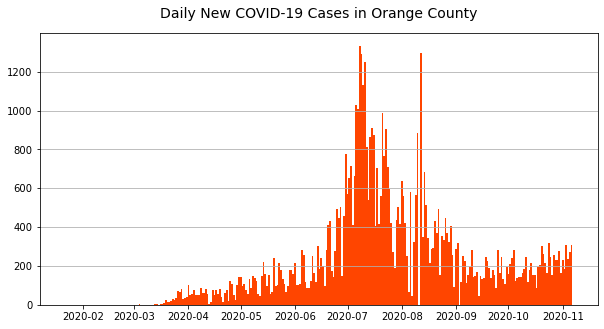

In [108]:
plt.figure(figsize=(10,5))
plt.gca().yaxis.grid()
plt.bar(x_vals, y_vals, width=1, color="orangered")
plt.title("Daily New COVID-19 Cases in Orange County", fontsize=14, pad=15)
plt.show()

## Homework Exercise

We pulled down the data for total COVID-19 cases for each US State and county from a Johns Hopkins Github Repository. Your job is to go to the URL and find the CSV file for COVID-19 deaths and to use Pandas to download this data.

```
covid_url  = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/"
covid_file = "time_series_covid19_confirmed_US.csv" # this is the file for COVID-19 cases, *not* deaths
```

Take the data and create a bar graph of the COVID-19 Daily Deaths per Population Density (persons per mi^2) for a California county of your choice. You will need to merge the COVID-19 data with the county statistics in the CSV file that is available on Blackboard.

Turn in a picture of your graph as homework. Your graph should have labels on it and the axes should have a reasonable/readable set of tick values.